In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency, f_oneway, ttest_ind, chi2, kstest 


plt.rcParams['figure.figsize'] = [16, 5]
plt.style.use('seaborn')

In [4]:
# load data dan perbaikan tipe data sesuai dengan notebook deskriptif analisis
file = 'https://raw.githubusercontent.com/mihoku/PJJ-Data-Analytics-Python/main/Hari%204/survey_fws_masked.csv'
raw_df = pd.read_csv(file, header=0)
raw_df.head()

,Eselon 1,Tempat tinggal,hari bekerja non WFH per bulannya,hari ideal bekerja non WFH seminggu,Lokasi melaksanakan WFH,lama bekerja ketika WFH sehari,jumlah rapat online paralel (multi zoom) sehari,improve-gaya komunikasi atasan,improve-sarana prasarana pendukung kerja,improve-pengaturan jam kerja,...,adv-lebih mengenal lingkungan tempat tinggal,adv-waktu menekuni hobi,adv-kualitas ibadah / kehidupan spiritual,adv-pola hidup lebih sehat,harapan peningkatan implementasi FWS,gender,age,masa_kerja_tahun,masa_kerja_bulan,kode_wilayah_ktp
0,Sekretariat Jenderal,Kontrak,di bawah 10 hari kerja,2 hari,Kos/tempat tinggal terpisah dari keluarga,< 6 jam 25 menit,< 2,Sangat Setuju,Sangat Setuju,Sangat Setuju,...,Setuju,Netral,Sangat Setuju,Netral,Semoga dengan implementasi FWS dapat mengurang...,pria,38,11,0,NaN
1,Sekretariat Jenderal,Milik Sendiri,di bawah 10 hari kerja,2 hari,Homebase,> 6 jam 25 menit,< 2,Sangat Setuju,Setuju,Sangat Setuju,...,Setuju,Setuju,Sangat Setuju,Sangat Setuju,Supaya dapat bekerja lebih baik lagi,pria,52,22,9,NaN
2,NaN,Milik Sendiri,di bawah 10 hari kerja,2 hari,Homebase,> 6 jam 25 menit,< 2,Setuju,Setuju,Setuju,...,Setuju,Setuju,Setuju,Setuju,NaN,pria,31,5,9,327605.0
3,Sekretariat Jenderal,Milik Sendiri,di bawah 10 hari kerja,4 hari,Kos/tempat tinggal terpisah dari keluarga,> 6 jam 25 menit,> 2\t,Setuju,Setuju,Sangat Setuju,...,Sangat Setuju,Sangat Setuju,Sangat Setuju,Sangat Setuju,semoga dapat diimplementasikan dengan baik,pria,30,8,1,NaN
4,Badan Pendidikan dan Pelatihan Keuangan,Kontrak,di bawah 10 hari kerja,3 hari,Satelite Office,> 6 jam 25 menit,> 2\t,Sangat Setuju,Sangat Setuju,Sangat Setuju,...,Netral,Netral,Netral,Netral,--,pria,54,31,1,737114.0


In [5]:
#retrieve information regarding the data
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Eselon 1                                         3595 non-null   object 
 1   Tempat tinggal                                   3643 non-null   object 
 2   hari bekerja non WFH per bulannya                3643 non-null   object 
 3   hari ideal bekerja non WFH seminggu              3643 non-null   object 
 4   Lokasi melaksanakan WFH                          3643 non-null   object 
 5   lama bekerja ketika WFH sehari                   3643 non-null   object 
 6   jumlah rapat online paralel (multi zoom) sehari  3643 non-null   object 
 7   improve-gaya komunikasi atasan                   3643 non-null   object 
 8   improve-sarana prasarana pendukung kerja         3643 non-null   object 
 9   improve-pengaturan jam kerja  

In [6]:
#separate non numeric column names
data_type = pd.DataFrame(raw_df.dtypes, columns=['data_type'])
data_type_char = data_type[data_type['data_type']=='object'].index.tolist()
data_type_char

['Eselon 1',
 'Tempat tinggal',
 'hari bekerja non WFH per bulannya',
 'hari ideal bekerja non WFH seminggu',
 'Lokasi melaksanakan WFH',
 'lama bekerja ketika WFH sehari',
 'jumlah rapat online paralel (multi zoom) sehari',
 'improve-gaya komunikasi atasan',
 'improve-sarana prasarana pendukung kerja',
 'improve-pengaturan jam kerja',
 'improve-beban kerja',
 'improve-pengelolaan kinerja pegawai',
 'adv-manajemen keuangan lebih baik',
 'adv-fokus meningkatkan kompetensi',
 'adv-kesempatan belajar',
 'adv-hubungan dg rekan kerja lebih baik',
 'adv-komunikasi dg keluarga dekat lebih baik',
 'adv-quality time dg keluarga inti',
 'adv-terlibat dengan komunitas',
 'adv-lebih mengenal lingkungan tempat tinggal',
 'adv-waktu menekuni hobi',
 'adv-kualitas ibadah / kehidupan spiritual',
 'adv-pola hidup lebih sehat',
 'harapan peningkatan implementasi FWS',
 'gender']

In [7]:
#alter the categorical likert scale data value
for i in data_type_char:
  raw_df[i].replace(['Sangat Tidak Setuju', 'Tidak Setuju','Netral','Setuju','Sangat Setuju'],
                        [1,2,3,4,5], inplace=True)
raw_df.head()

,Eselon 1,Tempat tinggal,hari bekerja non WFH per bulannya,hari ideal bekerja non WFH seminggu,Lokasi melaksanakan WFH,lama bekerja ketika WFH sehari,jumlah rapat online paralel (multi zoom) sehari,improve-gaya komunikasi atasan,improve-sarana prasarana pendukung kerja,improve-pengaturan jam kerja,...,adv-lebih mengenal lingkungan tempat tinggal,adv-waktu menekuni hobi,adv-kualitas ibadah / kehidupan spiritual,adv-pola hidup lebih sehat,harapan peningkatan implementasi FWS,gender,age,masa_kerja_tahun,masa_kerja_bulan,kode_wilayah_ktp
0,Sekretariat Jenderal,Kontrak,di bawah 10 hari kerja,2 hari,Kos/tempat tinggal terpisah dari keluarga,< 6 jam 25 menit,< 2,5,5,5,...,4,3,5,3,Semoga dengan implementasi FWS dapat mengurang...,pria,38,11,0,NaN
1,Sekretariat Jenderal,Milik Sendiri,di bawah 10 hari kerja,2 hari,Homebase,> 6 jam 25 menit,< 2,5,4,5,...,4,4,5,5,Supaya dapat bekerja lebih baik lagi,pria,52,22,9,NaN
2,NaN,Milik Sendiri,di bawah 10 hari kerja,2 hari,Homebase,> 6 jam 25 menit,< 2,4,4,4,...,4,4,4,4,NaN,pria,31,5,9,327605.0
3,Sekretariat Jenderal,Milik Sendiri,di bawah 10 hari kerja,4 hari,Kos/tempat tinggal terpisah dari keluarga,> 6 jam 25 menit,> 2\t,4,4,5,...,5,5,5,5,semoga dapat diimplementasikan dengan baik,pria,30,8,1,NaN
4,Badan Pendidikan dan Pelatihan Keuangan,Kontrak,di bawah 10 hari kerja,3 hari,Satelite Office,> 6 jam 25 menit,> 2\t,5,5,5,...,3,3,3,3,--,pria,54,31,1,737114.0


In [8]:
#clean the day column
raw_df['hari ideal bekerja non WFH seminggu'] = raw_df['hari ideal bekerja non WFH seminggu'].str.replace(" hari","")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Eselon 1                                         3595 non-null   object 
 1   Tempat tinggal                                   3643 non-null   object 
 2   hari bekerja non WFH per bulannya                3643 non-null   object 
 3   hari ideal bekerja non WFH seminggu              3643 non-null   object 
 4   Lokasi melaksanakan WFH                          3643 non-null   object 
 5   lama bekerja ketika WFH sehari                   3643 non-null   object 
 6   jumlah rapat online paralel (multi zoom) sehari  3643 non-null   object 
 7   improve-gaya komunikasi atasan                   3643 non-null   int64  
 8   improve-sarana prasarana pendukung kerja         3643 non-null   int64  
 9   improve-pengaturan jam kerja  

In [9]:
raw_df['hari ideal bekerja non WFH seminggu'] = raw_df['hari ideal bekerja non WFH seminggu'].astype('int64')
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3643 entries, 0 to 3642
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Eselon 1                                         3595 non-null   object 
 1   Tempat tinggal                                   3643 non-null   object 
 2   hari bekerja non WFH per bulannya                3643 non-null   object 
 3   hari ideal bekerja non WFH seminggu              3643 non-null   int64  
 4   Lokasi melaksanakan WFH                          3643 non-null   object 
 5   lama bekerja ketika WFH sehari                   3643 non-null   object 
 6   jumlah rapat online paralel (multi zoom) sehari  3643 non-null   object 
 7   improve-gaya komunikasi atasan                   3643 non-null   int64  
 8   improve-sarana prasarana pendukung kerja         3643 non-null   int64  
 9   improve-pengaturan jam kerja  

In [10]:
#separate non numeric column names
data_type_2 = pd.DataFrame(raw_df.dtypes, columns=['data_type'])
data_type_numeric_new = data_type_2[data_type_2['data_type']!='object'].index.tolist()
data_type_numeric_new.append('gender')
data_type_numeric_new.append('lama bekerja ketika WFH sehari')
data_type_numeric_new.append('jumlah rapat online paralel (multi zoom) sehari')
print(data_type_numeric_new)

['hari ideal bekerja non WFH seminggu', 'improve-gaya komunikasi atasan', 'improve-sarana prasarana pendukung kerja', 'improve-pengaturan jam kerja', 'improve-beban kerja', 'improve-pengelolaan kinerja pegawai', 'adv-manajemen keuangan lebih baik', 'adv-fokus meningkatkan kompetensi', 'adv-kesempatan belajar', 'adv-hubungan dg rekan kerja lebih baik', 'adv-komunikasi dg keluarga dekat lebih baik', 'adv-quality time dg keluarga inti', 'adv-terlibat dengan komunitas', 'adv-lebih mengenal lingkungan tempat tinggal', 'adv-waktu menekuni hobi', 'adv-kualitas ibadah / kehidupan spiritual', 'adv-pola hidup lebih sehat', 'age', 'masa_kerja_tahun', 'masa_kerja_bulan', 'kode_wilayah_ktp', 'gender', 'lama bekerja ketika WFH sehari', 'jumlah rapat online paralel (multi zoom) sehari']


In [11]:
df = raw_df[data_type_numeric_new]
df.head()

,hari ideal bekerja non WFH seminggu,improve-gaya komunikasi atasan,improve-sarana prasarana pendukung kerja,improve-pengaturan jam kerja,improve-beban kerja,improve-pengelolaan kinerja pegawai,adv-manajemen keuangan lebih baik,adv-fokus meningkatkan kompetensi,adv-kesempatan belajar,adv-hubungan dg rekan kerja lebih baik,...,adv-waktu menekuni hobi,adv-kualitas ibadah / kehidupan spiritual,adv-pola hidup lebih sehat,age,masa_kerja_tahun,masa_kerja_bulan,kode_wilayah_ktp,gender,lama bekerja ketika WFH sehari,jumlah rapat online paralel (multi zoom) sehari
0,2,5,5,5,5,5,5,5,5,5,...,3,5,3,38,11,0,NaN,pria,< 6 jam 25 menit,< 2
1,2,5,4,5,4,5,4,4,5,5,...,4,5,5,52,22,9,NaN,pria,> 6 jam 25 menit,< 2
2,2,4,4,4,4,4,4,4,4,4,...,4,4,4,31,5,9,327605.0,pria,> 6 jam 25 menit,< 2
3,4,4,4,5,5,5,5,5,5,5,...,5,5,5,30,8,1,NaN,pria,> 6 jam 25 menit,> 2\t
4,3,5,5,5,5,5,3,5,5,5,...,3,3,3,54,31,1,737114.0,pria,> 6 jam 25 menit,> 2\t


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90f64e6a50>,
      dtype=object)

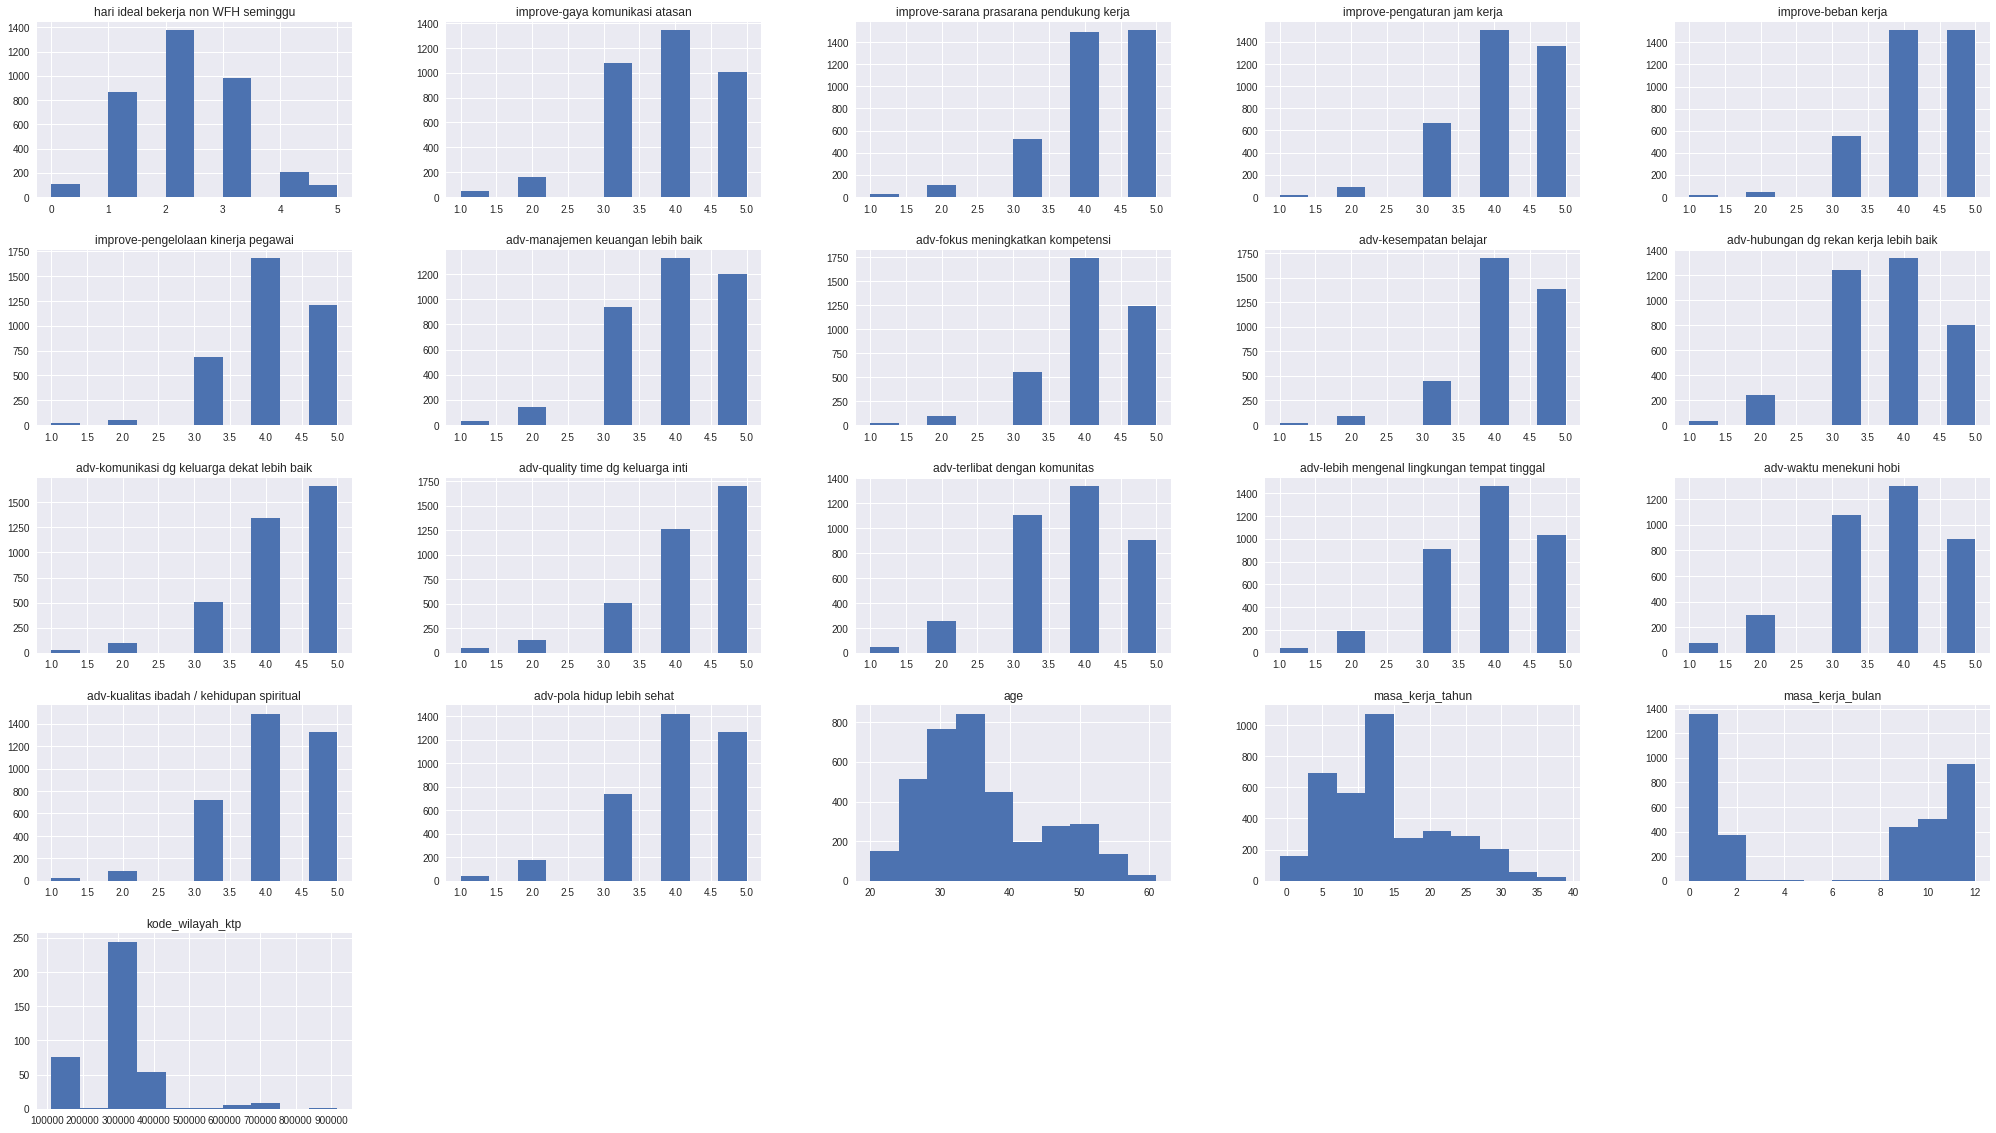

In [12]:
%matplotlib inline
fig = plt.figure(figsize = (35,20)) 
ax = fig.gca()
raw_df[data_type_numeric_new].hist(ax=ax)


##Kesimpulan sementara statistik deskriptif
1. Hari terbanyak non WFH yang dikehendaki pegawai adalah 2 hari.
2. Pegawai menyatakan beberapa keuntungan terkait dengan WFH antara lain:
 

*   Manajemen keuangan yang lebih baik
*   Fokus meningkatkan kompetensi, adanya kesempatan belajar, serta memiliki waktu menekuni hobi
* Hubungan dengan rekan kerja lebih baik
* Komunikasi dengan keluarga dekat lebih baik serta memperoleh quality time dengan keluarga inti
* Terlibat dengan komunitas serta lebih mengenal lingkungan tempat tinggal
* Peningkatan kualitas ibadah/kehidupan spiritual
* Pola hidup lebih sehat

3. Ada beberapa hal yang bisa diimprove antara lain:

* Gaya komunikasi atasan
* Sarana prasarana pendukung kerja
* Pengaturan jam kerja dan beban kerja
* Pengelolaan kinerja pegawai



#Uji Korelasi

In [13]:
num_cols = df.describe().columns
#use spearman correlation for the normality of the data distribution is unknown
korelasi = df[num_cols].corr(method='spearman').reset_index()
korelasi.sort_values('hari ideal bekerja non WFH seminggu',ascending=False).style.background_gradient(cmap='summer')

,index,hari ideal bekerja non WFH seminggu,improve-gaya komunikasi atasan,improve-sarana prasarana pendukung kerja,improve-pengaturan jam kerja,improve-beban kerja,improve-pengelolaan kinerja pegawai,adv-manajemen keuangan lebih baik,adv-fokus meningkatkan kompetensi,adv-kesempatan belajar,adv-hubungan dg rekan kerja lebih baik,adv-komunikasi dg keluarga dekat lebih baik,adv-quality time dg keluarga inti,adv-terlibat dengan komunitas,adv-lebih mengenal lingkungan tempat tinggal,adv-waktu menekuni hobi,adv-kualitas ibadah / kehidupan spiritual,adv-pola hidup lebih sehat,age,masa_kerja_tahun,masa_kerja_bulan,kode_wilayah_ktp
0,hari ideal bekerja non WFH seminggu,1.000000,0.022613,0.013185,-0.001306,-0.002561,0.014406,-0.112617,-0.097041,-0.075173,-0.033870,-0.064405,-0.079082,-0.032740,-0.035956,-0.042989,-0.051320,-0.051841,0.123476,0.112023,0.017689,-0.015569
17,age,0.123476,0.001538,-0.012676,-0.053441,-0.117662,-0.010741,-0.079720,-0.033495,-0.014034,0.032565,0.003027,-0.003666,-0.016782,-0.006958,-0.096843,-0.031023,-0.009548,1.000000,0.936788,-0.029809,0.066616
18,masa_kerja_tahun,0.112023,0.007260,0.000883,-0.054075,-0.106486,-0.004488,-0.073288,-0.031670,-0.010975,0.011187,0.011567,0.009499,-0.012012,-0.002215,-0.088752,-0.033096,-0.012979,0.936788,1.000000,-0.108588,0.054190
1,improve-gaya komunikasi atasan,0.022613,1.000000,0.505875,0.477677,0.507686,0.531332,0.180365,0.248302,0.243557,0.211860,0.171935,0.158233,0.212654,0.200298,0.196053,0.179101,0.171486,0.001538,0.007260,-0.002333,0.051547
19,masa_kerja_bulan,0.017689,-0.002333,-0.043816,-0.008355,-0.011676,-0.022231,-0.002574,0.023810,0.014261,0.016067,-0.007675,-0.020371,0.015150,0.003862,0.007851,0.005587,-0.003273,-0.029809,-0.108588,1.000000,-0.125168
5,improve-pengelolaan kinerja pegawai,0.014406,0.531332,0.539918,0.629698,0.709282,1.000000,0.178301,0.307125,0.321696,0.233219,0.212355,0.201495,0.232073,0.217692,0.206968,0.200764,0.192639,-0.010741,-0.004488,-0.022231,-0.026150
2,improve-sarana prasarana pendukung kerja,0.013185,0.505875,1.000000,0.508581,0.526321,0.539918,0.172360,0.289425,0.309985,0.226505,0.204096,0.198492,0.202518,0.195550,0.180111,0.201864,0.197270,-0.012676,0.000883,-0.043816,0.047464
3,improve-pengaturan jam kerja,-0.001306,0.477677,0.508581,1.000000,0.671783,0.629698,0.134890,0.254585,0.250421,0.188994,0.137474,0.132617,0.171054,0.151115,0.139106,0.156065,0.140111,-0.053441,-0.054075,-0.008355,-0.066650
4,improve-beban kerja,-0.002561,0.507686,0.526321,0.671783,1.000000,0.709282,0.174036,0.249250,0.265994,0.174840,0.166577,0.157702,0.170306,0.181366,0.156523,0.173890,0.151793,-0.117662,-0.106486,-0.011676,-0.054239
20,kode_wilayah_ktp,-0.015569,0.051547,0.047464,-0.066650,-0.054239,-0.026150,-0.000361,0.004855,-0.000847,0.000009,0.071052,0.093783,0.044690,0.070992,0.059270,0.053834,0.065484,0.066616,0.054190,-0.125168,1.000000


Sekilas, dapat dilihat bahwa umur dan masa kerja memiliki korelasi positif dengan jumlah hari non-WFH yang diinginkan. 

#Relationship Test
Di relationship test ini digunakan Cramer test dan chi square test. Chi Sq Test menguji apakah ada hubungan signifikan antar variable. Sementara Cramer test menguji kekuatan hubungan antar variable kategorical.

In [14]:
# fungsi chi2 test yang akan digunakan, didalamnya juga terdapat uji cramer test
def chi2_test(v1, v2, conv_interval = 0.99):
    alpha = 1 - conv_interval
    cont_table = pd.crosstab(v1, v2, margins = False)
    
    # chi test
    chi_square, p_value, dof, expected = chi2_contingency(cont_table)
        
    # The p-value approach
    print("Chi Squared Significancy Test")
    conclusion = "Failed to reject the null hypothesis (no correlation between variables)"
    if p_value <= alpha:
        conclusion = "Null Hypothesis (no correlation between variables) is rejected."

    print("chisquare-score is:", chi_square, " and p value is:", p_value)
    print(conclusion)
    
    # cramer V test
    print("\nCramer V Association Test")
    N = np.sum(cont_table.values)
    minimum_dimension = min(cont_table.shape)-1
    # Calculate Cramer's V
    cramer_value = np.sqrt((chi_square/N) / minimum_dimension)
    
    if cramer_value < 0.25:
        conclusion = 'Weak'
    elif cramer_value < 0.75:
        conclusion = 'Moderate'
    else:
        conclusion = 'Strong'
    
    if cramer_value == 0:
        conclusion = 'No'
    elif cramer_value == 1:
        conclusion = 'Perfect'
        
    
#     print(dof)
    # Print the result
    print("V =", cramer_value,"\nConclusion:",conclusion,'Association')

##Relationship test 1: Menguji variabel yang memiliki korelasi tertinggi

In [17]:
chi2_test(df['hari ideal bekerja non WFH seminggu'],df['age'])

Chi Squared Significancy Test
chisquare-score is: 315.33091290688765  and p value is: 1.1338983784617404e-06
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.1315735783809397 
Conclusion: Weak Association


In [18]:
chi2_test(df['hari ideal bekerja non WFH seminggu'],df['masa_kerja_tahun'])

Chi Squared Significancy Test
chisquare-score is: 335.3725936426578  and p value is: 6.444481983818298e-09
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.13569042320430574 
Conclusion: Weak Association


##Kesimpulan sementara relationship test *1*:
Sekalipun secara korelasi memiliki koefisien cukup tinggi, namun berdasarkan relationship test menggunakan chisq test, terlihat bahwa masing-masing hubungan umur dan masa kerja tahun dengan hari non WFH yang diinginkan tidak signifikan. 

##Relationship test 2: Menguji variabel advantages WFH terhadap hari non WFO yang diinginkan

In [20]:
num_cols = list(filter(lambda x: x.startswith('adv'), df.describe().columns))
for i in num_cols:
  print("Variabel Hari WFH Seminggu dan %s"%i)
  chi2_test(df['hari ideal bekerja non WFH seminggu'],df[i])
  print("\n")

Variabel Hari WFH Seminggu dan adv-manajemen keuangan lebih baik
Chi Squared Significancy Test
chisquare-score is: 111.63730404194699  and p value is: 9.866952397945582e-15
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.08752761379180571 
Conclusion: Weak Association


Variabel Hari WFH Seminggu dan adv-fokus meningkatkan kompetensi
Chi Squared Significancy Test
chisquare-score is: 97.15567012514927  and p value is: 4.052587972352283e-12
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.08165344161051954 
Conclusion: Weak Association


Variabel Hari WFH Seminggu dan adv-kesempatan belajar
Chi Squared Significancy Test
chisquare-score is: 80.82887012083127  and p value is: 2.8382292908467012e-09
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.07447725691797297 
Conclusion: Weak Association


Variabel Hari WFH Seminggu dan adv-hubungan dg rekan

##Kesimpulan sementara relationship test *2*:
Berdasarkan cramer test, seluruh keuntungungan WFH memiliki asosiasi yang lemah dengan hari non WFH yang diinginkan. 

##Relationship test 3: Menguji variabel hal yang perlu diimprove dari WFH terhadap hari non WFO yang diinginkan

In [22]:
num_cols = list(filter(lambda x: x.startswith('improve'), df.describe().columns))
for i in num_cols:
  print("Variabel Hari WFH Seminggu dan %s"%i)
  chi2_test(df[i],df['hari ideal bekerja non WFH seminggu'])
  print("\n")

Variabel Hari WFH Seminggu dan improve-gaya komunikasi atasan
Chi Squared Significancy Test
chisquare-score is: 53.56767042976085  and p value is: 6.703035260621597e-05
Null Hypothesis (no correlation between variables) is rejected.

Cramer V Association Test
V = 0.060630590604104535 
Conclusion: Weak Association


Variabel Hari WFH Seminggu dan improve-sarana prasarana pendukung kerja
Chi Squared Significancy Test
chisquare-score is: 29.271674659138167  and p value is: 0.08254619523379696
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.04481921064474035 
Conclusion: Weak Association


Variabel Hari WFH Seminggu dan improve-pengaturan jam kerja
Chi Squared Significancy Test
chisquare-score is: 29.545314072122757  and p value is: 0.07756384518894414
Failed to reject the null hypothesis (no correlation between variables)

Cramer V Association Test
V = 0.04502821428625765 
Conclusion: Weak Association


Variabel Hari WFH Seminggu da

##Kesimpulan sementara relationship test *3*:
Berdasarkan cramer test, seluruh hal yang perlu diimprove dari WFH memiliki asosiasi yang lemah dengan hari non WFH yang diinginkan. 